In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
%store -r df

In [26]:
df.columns.tolist()

['Immoweb ID',
 'property sub-type',
 'Price',
 'Building condition',
 'Kitchen type',
 'Bedrooms',
 'Furnished',
 'Number of frontages',
 'Swimming pool',
 'Surface of the plot',
 'Living area',
 'Prop_orig',
 'Post_code_orig',
 'Property type_APARTMENT',
 'Property type_HOUSE',
 'Post code_1000',
 'Post code_1020',
 'Post code_1030',
 'Post code_1040',
 'Post code_1050',
 'Post code_1060',
 'Post code_1070',
 'Post code_1080',
 'Post code_1081',
 'Post code_1082',
 'Post code_1083',
 'Post code_1090',
 'Post code_1120',
 'Post code_1130',
 'Post code_1140',
 'Post code_1150',
 'Post code_1160',
 'Post code_1170',
 'Post code_1180',
 'Post code_1190',
 'Post code_1200',
 'Post code_1210',
 'Post code_1300',
 'Post code_1301',
 'Post code_1310',
 'Post code_1315',
 'Post code_1320',
 'Post code_1325',
 'Post code_1330',
 'Post code_1331',
 'Post code_1332',
 'Post code_1340',
 'Post code_1341',
 'Post code_1342',
 'Post code_1348',
 'Post code_1350',
 'Post code_1357',
 'Post code_1360

In [27]:
df.describe()

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,...,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label,price/m2
count,1.221100e+04,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,...,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000
mean,9.500595e+06,5.252729e+05,3.823192,0.802719,3.101548,0.043403,3.001392,0.713373,1601.748424,201.716321,...,0.000082,0.000164,0.000082,0.000082,0.001802,0.000082,0.000328,0.581607,0.288674,3017.317680
std,3.476977e+05,5.793457e+05,1.661760,0.756936,2.793377,0.203772,0.782328,0.452204,12457.860556,269.926132,...,0.009049,0.012797,0.009049,0.009049,0.042409,0.009049,0.018097,0.493316,0.453165,2229.847179
min,4.611027e+06,9.500000e+02,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.860000
25%,9.471052e+06,2.350000e+05,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1875.545000
50%,9.614689e+06,3.455000e+05,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2579.170000
75%,9.686466e+06,5.900000e+05,6.000000,1.000000,4.000000,0.000000,4.000000,1.000000,736.000000,230.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3466.735000
max,9.731707e+06,9.500000e+06,6.000000,2.000000,204.000000,1.000000,16.000000,1.000000,580608.000000,11000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40566.670000


## Correlation before

In [28]:
# display all df row
pd.options.display.max_rows = 999

### Correlation between price and variables

In [29]:
# df_excluded = df.loc[:, ~df.columns.isin(['price/m2'])]

df_excluded_post_code = df.loc[:,~df.columns.str.startswith('Post code_')]
df_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2'])]

corr = df_excluded.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                      1.000000
Living area                0.451236
Surface of the plot        0.357749
Bedrooms                   0.327389
Property type_HOUSE        0.283683
Number of frontages        0.202133
Building condition         0.147350
Kitchen type               0.137699
Terrace_Combined           0.107680
garden_label               0.081931
Swimming pool             -0.013529
Immoweb ID                -0.034834
Furnished                 -0.038973
Post_code_orig            -0.103292
Property type_APARTMENT   -0.283683
Name: Price, dtype: float64

### make a graph

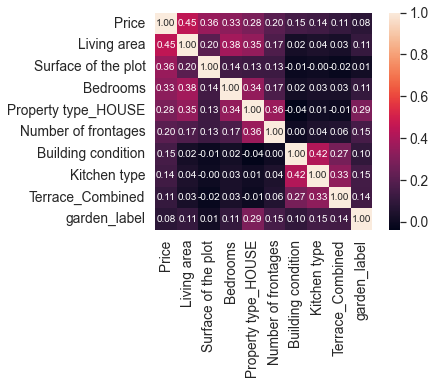

In [42]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Correlation between variables

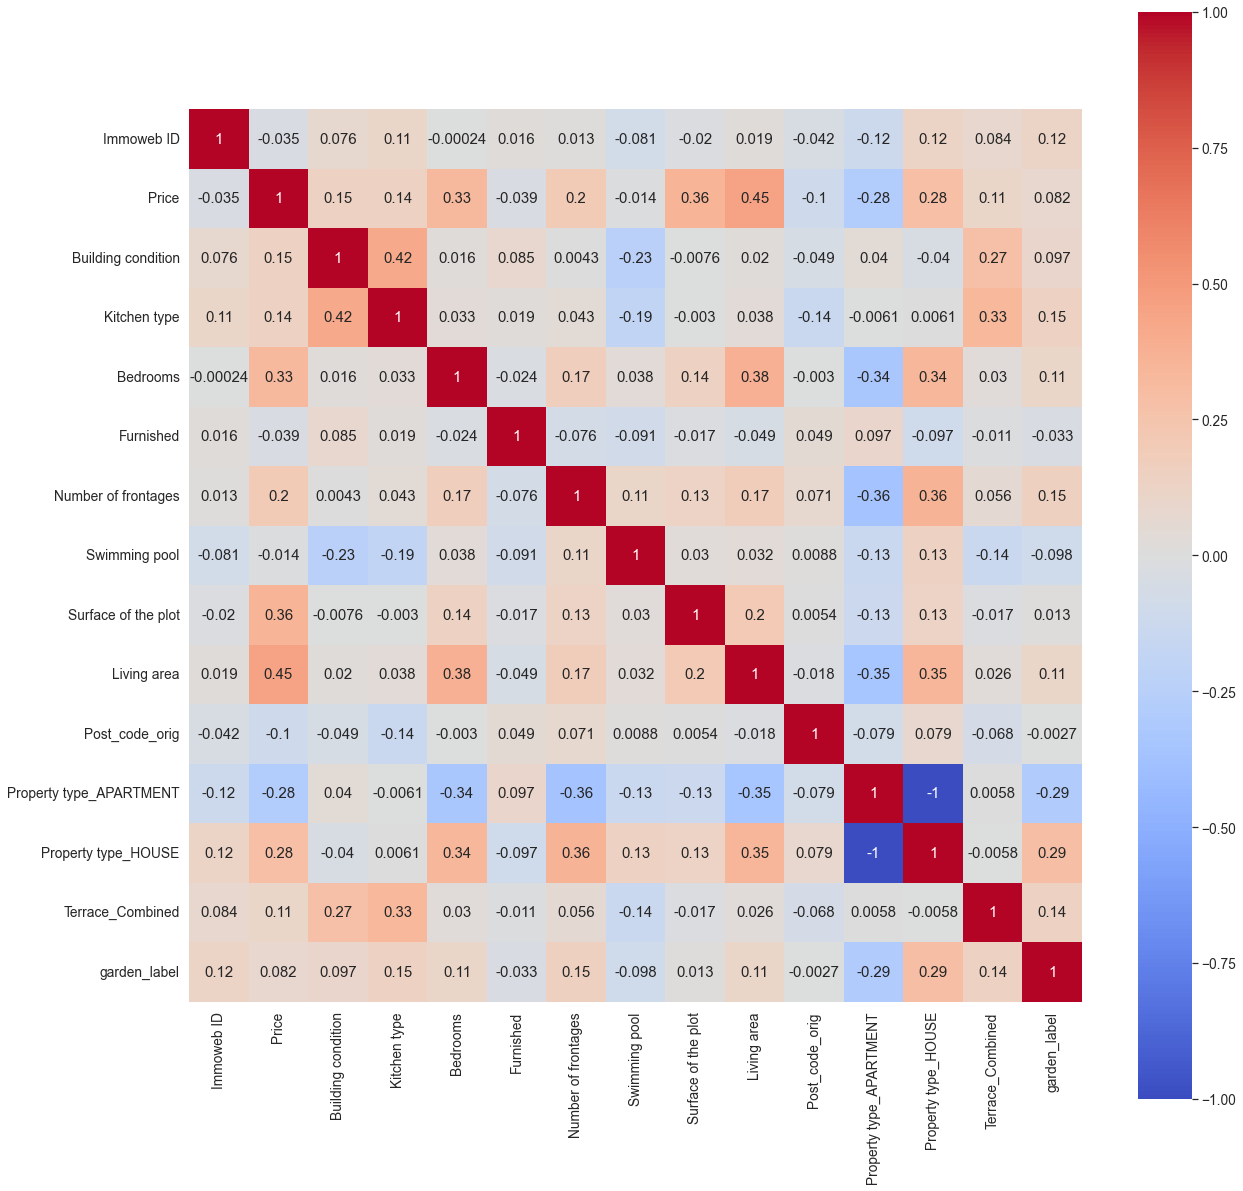

In [39]:
#correlation matrix
corrmat = df_excluded.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True, annot=True, cmap="coolwarm");